<a href="https://colab.research.google.com/github/aswini-training/python/blob/main/Forest_Fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Q1:Top 10 maximum burnt area happened on which month.
import pandas as pd
import numpy as np
from tabulate import tabulate
from datetime import datetime
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/forestfires.csv')
#Group by month and sum the burnt area to get the total burnt area for each month.
df_forestfire = df.groupby('month')['area'].sum().reset_index()
top_10_max_month = df_forestfire.nlargest(10, 'area')
print((tabulate(top_10_max_month,headers=['Month','Area'],tablefmt='grid')))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
+----+---------+---------+
|    | Month   |    Area |
+====+=========+=========+
| 11 | sep     | 3086.13 |
+----+---------+---------+
|  1 | aug     | 2297.99 |
+----+---------+---------+
|  5 | jul     |  459.83 |
+----+---------+---------+
|  7 | mar     |  235.26 |
+----+---------+---------+
|  3 | feb     |  125.5  |
+----+---------+---------+
|  2 | dec     |  119.97 |
+----+---------+---------+
| 10 | oct     |   99.57 |
+----+---------+---------+
|  6 | jun     |   99.3  |
+----+---------+---------+
|  0 | apr     |   80.02 |
+----+---------+---------+
|  8 | may     |   38.48 |
+----+---------+---------+


In [7]:
# Group by month and find the maximum burnt area for single events
max_burnt_area_per_month = df.groupby('month')['area'].max().reset_index()
for_single_event = max_burnt_area_per_month.nlargest(10, 'area')
print((tabulate(for_single_event,headers=['Month','Area'],tablefmt='grid')))


+----+---------+---------+
|    | Month   |    Area |
+====+=========+=========+
| 11 | sep     | 1090.84 |
+----+---------+---------+
|  1 | aug     |  746.28 |
+----+---------+---------+
|  5 | jul     |  278.53 |
+----+---------+---------+
|  6 | jun     |   70.32 |
+----+---------+---------+
|  0 | apr     |   61.13 |
+----+---------+---------+
|  3 | feb     |   51.78 |
+----+---------+---------+
| 10 | oct     |   49.37 |
+----+---------+---------+
|  8 | may     |   38.48 |
+----+---------+---------+
|  7 | mar     |   36.85 |
+----+---------+---------+
|  2 | dec     |   24.77 |
+----+---------+---------+


In [8]:
#Q2: Highest temperature and lowest temperature for each month
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

#Applying the categorical conversion with the correct month_order
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

# Group by 'month' and aggregate temperature data
temp_summary = df.groupby('month')['temp'].agg(['min', 'max']).reset_index().rename(columns={'min': 'Low_Temp', 'max': 'High_Temp'})
print(tabulate(temp_summary, headers='keys', tablefmt='grid'))


+----+---------+------------+-------------+
|    | month   |   Low_Temp |   High_Temp |
+====+=========+============+=============+
|  0 | jan     |        5.2 |         5.3 |
+----+---------+------------+-------------+
|  1 | feb     |        4.2 |        15.7 |
+----+---------+------------+-------------+
|  2 | mar     |        5.3 |        18.8 |
+----+---------+------------+-------------+
|  3 | apr     |        5.8 |        17.6 |
+----+---------+------------+-------------+
|  4 | may     |       11.3 |        18   |
+----+---------+------------+-------------+
|  5 | jun     |       10.6 |        28   |
+----+---------+------------+-------------+
|  6 | jul     |       12.6 |        30.2 |
+----+---------+------------+-------------+
|  7 | aug     |        5.1 |        33.3 |
+----+---------+------------+-------------+
|  8 | sep     |        9.8 |        30.2 |
+----+---------+------------+-------------+
|  9 | oct     |       11.3 |        21.7 |
+----+---------+------------+---

In [9]:
#Q3:Monthly when highest wind and lowest wind happened.
#Output:month,highest_wind, lowest_wind
Wind = df.groupby('month')['wind'].agg(['min', 'max']).reset_index().rename(columns={'min': 'Lowest_Wind', 'max': 'Highest_Wind'})
print(tabulate(Wind, headers='keys', tablefmt='grid'))


+----+---------+---------------+----------------+
|    | month   |   Lowest_Wind |   Highest_Wind |
+====+=========+===============+================+
|  0 | jan     |           0.9 |            3.1 |
+----+---------+---------------+----------------+
|  1 | feb     |           0.9 |            9.4 |
+----+---------+---------------+----------------+
|  2 | mar     |           0.9 |            9.4 |
+----+---------+---------------+----------------+
|  3 | apr     |           1.8 |            9.4 |
+----+---------+---------------+----------------+
|  4 | may     |           4   |            4.9 |
+----+---------+---------------+----------------+
|  5 | jun     |           1.3 |            9.4 |
+----+---------+---------------+----------------+
|  6 | jul     |           0.9 |            8   |
+----+---------+---------------+----------------+
|  7 | aug     |           0.4 |            8.9 |
+----+---------+---------------+----------------+
|  8 | sep     |           0.9 |            7.6 |


In [10]:
#Q4:Highest and lowest relative humidity for each month.
#Output: month,highest_rh, lowest_rh
Humidity = df.groupby('month')['RH'].agg(['min', 'max']).reset_index().rename(columns={'min': 'Lowest_humidity', 'max': 'Highest_humidity'})
print(tabulate(Humidity, headers='keys', tablefmt='grid'))


+----+---------+-------------------+--------------------+
|    | month   |   Lowest_humidity |   Highest_humidity |
+====+=========+===================+====================+
|  0 | jan     |                78 |                100 |
+----+---------+-------------------+--------------------+
|  1 | feb     |                35 |                 82 |
+----+---------+-------------------+--------------------+
|  2 | mar     |                18 |                 99 |
+----+---------+-------------------+--------------------+
|  3 | apr     |                20 |                 75 |
+----+---------+-------------------+--------------------+
|  4 | may     |                40 |                 94 |
+----+---------+-------------------+--------------------+
|  5 | jun     |                25 |                 90 |
+----+---------+-------------------+--------------------+
|  6 | jul     |                22 |                 90 |
+----+---------+-------------------+--------------------+
|  7 | aug    

In [14]:
#Q5:Join the output from questions 1-4 above.
#Output:month,area,highest_temp, lowest_temp,highest_wind, lowest_wind,highest_rh, lowest_rh
df1_combine = for_single_event.merge(temp_summary, on='month', how='outer')
df2 = df1_combine.merge(Wind, on='month', how='outer')
df3 = df2.merge(Humidity, on='month', how='outer')
df3['month'] = pd.to_datetime(df3['month'], format='%b')
df3.sort_values(by='month', inplace=True)
df3['month'] = df3['month'].dt.strftime('%b')
nan_replace = ['area', 'Low_Temp', 'High_Temp', 'Lowest_Wind', 'Lowest_humidity', 'Highest_humidity']
df3[nan_replace] = df3[nan_replace].fillna(0) - #replacing NaN values with 0 in the specified columns.
print(tabulate(df3, headers='keys', tablefmt='grid'))

   month   area  Low_Temp  High_Temp  Lowest_Wind  Highest_Wind  \
10   Jan   0.00       5.2        5.3          0.9           3.1   
5    Feb  51.78       4.2       15.7          0.9           9.4   
8    Mar  36.85       5.3       18.8          0.9           9.4   
4    Apr  61.13       5.8       17.6          1.8           9.4   
7    May  38.48      11.3       18.0          4.0           4.9   

    Lowest_humidity  Highest_humidity  
10               78               100  
5                35                82  
8                18                99  
4                20                75  
7                40                94  
+----+---------+---------+------------+-------------+---------------+----------------+-------------------+--------------------+
|    | month   |    area |   Low_Temp |   High_Temp |   Lowest_Wind |   Highest_Wind |   Lowest_humidity |   Highest_humidity |
+====+=========+=========+============+=============+===============+================+===============

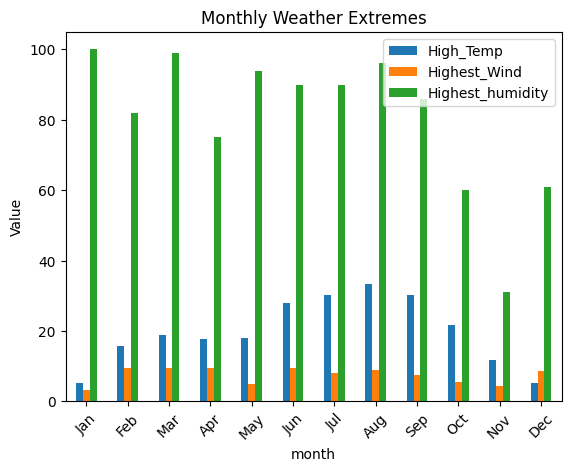

In [15]:
#Plot a group bar chart for the output in question 5.
#For schema, see Appendix here :X-axis -> Month;Bar 1 -> highest_temp;Bar 2 -> highest_wind;Bar 3 -> highest_rh
import seaborn as sns
import matplotlib.pyplot as plt
ax = df3.plot(x="month", y=["High_Temp", "Highest_Wind", "Highest_humidity"], kind="bar", title="Monthly Weather Extremes")
ax.set_xticklabels(df3['month'], rotation=45)
plt.xlabel('month')
plt.ylabel('Value')
plt.legend()
plt.show()

In [61]:
#Part 2
#Q1: Find Maximum salary for each department only active employees and output requires emp_id, department, max_salary
from google.colab import drive
drive.mount('/content/drive')
dept = pd.read_csv('/content/drive/MyDrive/department.csv')
not_active = pd.read_csv('/content/drive/MyDrive/not_active.csv')
emp = pd.read_csv('/content/drive/MyDrive/employee.csv')
# Merging the department and salary DataFrames on emp_id
df_merged = pd.merge(dept, emp, on='emp_id', how='inner')
df1 = pd.merge(df_merged, not_active, on='emp_id', how='outer')
df1['status'] = 'active'
df1.loc[df1['emp_id'] == 3, 'status'] = 'not active'
df1.loc[df1['emp_id'] == 7, 'status'] = 'not active'
active_employees = df1[df1['status'] == 'active']
sorterd_employees = active_employees.groupby('department')[['emp_id','salary']].max().reset_index()

# renaming a columns as required:
max_salary_employees.rename(columns={'salary': 'max_salary'}, inplace=True)

# Print the result
print(max_salary_employees)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   emp_id department  max_salary
5       6  marketing         150
3       4      sales         140


In [62]:
#Q2: All active/inactive employees (=emp_id) and their correspond department maximum salary:
all_emp = df1.groupby('department')[['emp_id','salary']].max().reset_index()
all_emp.rename(columns={'salary': 'max_salary'}, inplace=True)
all_emp = all_emp[['emp_id', 'department', 'max_salary']]
print(all_emp)


   emp_id department  max_salary
0       7  marketing         250
1       4      sales         145
